In [1]:
from tralvisualizer.repeatdiagram import RepeatDiagram, show_hmm_state
from tral.hmm import hmm, hmm_viterbi #, hmm_io, 
from tral.sequence import sequence
import Bio
from Bio import SeqIO
try:
    from tqdm import tqdm_notebook  # for a progress bar; optional
except ImportError:
    def tqdm_notebook(iterable, **kwargs):
        yield from iterable

# RepeatDiagram

This class is useful for comparing two sets of repeats on the same row. It requires the (TRAL) sequence and a RepeatList object for each protein.

It uses the BioPython GeneomeDiagram internally for the display. It's a little clunky because it expects BioPython sequences when generating the diagram, but to generate the repeats we use TRAL sequences. This could be improved.

In [2]:
#Import HMM built from the seed sequence using hmmer
hmmfile = "example.hmm"
profile = hmm.HMM.create(input_format = 'hmmer', file = hmmfile)

In [3]:
# Need tral-format sequences for hmm detection
tralseqs = sequence.Sequence.create(file="example.faa",  input_format = 'fasta')
# This should take ~30 sec
repeats = [seq.detect(lHMM = [profile]) for seq in tqdm_notebook(tralseqs) ]

In [4]:
# Need BioPython sequences for RepeatDiagram
bioseqs = list(SeqIO.parse("example.faa", 'fasta', Bio.Alphabet.generic_protein))

pagesize=(800, 640)


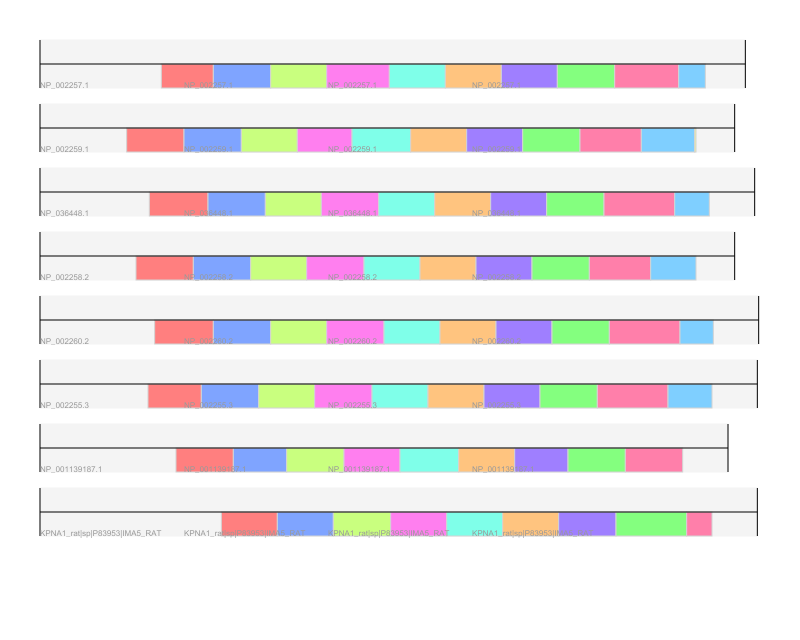

In [5]:
rd = RepeatDiagram(bioseqs)
for seq,replist in zip(bioseqs,repeats):
    rd.add_repeats(seq.id, replist, -1)
rd.image(size=(800,.1), feature_options={"label":True})

pagesize=(200, 150)


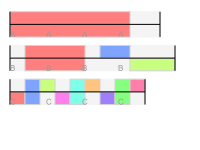

In [6]:
# Manual usage
d = RepeatDiagram([("A",10),("B",11),("C",9)])
d.feature_options["sigil"]="BOX"
d.add_repeat("A",(0,8))
d.add_repeat("B",(1,5),0)
d.add_repeat("B",(6,8),1)
d.add_repeat("B",(8,11),-1)
for i in range(9):
    d.add_repeat("C",(i,i+1),i%3 - 1)
size = (200,.25)
#d.save(join(root,"test.png"),size=size)
d.image(size=size)

## show_hmm_state

Here is an alternative which is useful when using hmm_viterbi or tral_search. It takes the sequence string and a list of states, and uses this to color the sequence. This allows more precise comparison of the repeats than is available from a TRAL RepeatList, which only gives the start and end of each repeat.

In [7]:
seq = bioseqs[0].seq # string
states = hmm_viterbi.viterbi(profile, seq)
print(" ".join(states))

N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 I26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 I40 I40 M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M1 I1 I1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 I24 I24 I24 I24 I24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 I10 I10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M1 M2 M3 I3 I3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26

In [8]:
# Show narrow bar without sequence
show_hmm_state(profile, seq, states, style="font-size:1pt;height:10px;display:inline-block;")

In [9]:
# Show wrapped sequence without termini
show_hmm_state(profile, seq, states, width=43,trim="NC")